## LSTM Air Passengers Demo

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, LSTM,Input
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import MinMaxScaler
import keras

In [7]:
passengers=pd.read_csv('AirPassengers.csv',usecols=[1])

In [48]:
passengers=pd.read_csv('airline-passengers.csv', usecols=[1] )

In [8]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 1 columns):
Passengers    732 non-null int64
dtypes: int64(1)
memory usage: 5.8 KB


In [9]:
passengers=passengers.astype('float64')

In [10]:
lookback=1
new_count=[]
for i in range(0,len(passengers)-lookback):
    new_count.append(passengers.Passengers[i+lookback])
new_count.append(0)
print(len(passengers),len(new_count))

732 732


In [11]:
passengers['NewCount']=new_count

In [ ]:
passengers.head()

In [ ]:
passengers.info()

In [14]:
target=passengers['NewCount']
features=passengers.drop('NewCount',axis=1)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.2,random_state=567)

In [16]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((585, 1), (585,), (147, 1), (147,))

In [17]:
ytrain=ytrain.to_numpy().reshape(-1,1)
ytest=ytest.to_numpy().reshape(-1,1)

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1))
xtrain = scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)
ytrain=scaler.fit_transform(ytrain)
ytest=scaler.fit_transform(ytest)

In [19]:
ytrain=ytrain.reshape(-1,)
ytest=ytest.reshape(-1,)

In [20]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

In [21]:
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [ ]:
ytrain=ytrain.to_numpy()

In [ ]:
ytest=ytest.to_numpy()

In [24]:

print(type(xtrain),type(ytrain),type(xtest),type(ytest))
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape



<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


((585, 1, 1), (585,), (147, 1, 1), (147,))

In [25]:
input_layer=Input(shape=(xtrain.shape[1:]))
hidden_layer1=LSTM(4)(input_layer)
output_layer=Dense(1,activation='linear')(hidden_layer1)

In [26]:
model=Model(inputs=input_layer,outputs=output_layer)

In [27]:
learning_rate=0.005
adam=keras.optimizers.Adam(lr=learning_rate)
sgd=keras.optimizers.SGD(lr=learning_rate,momentum=0.9)
#opt=keras.optimizers.TFOptimizer(keras.optimizers.RMSprop())

In [28]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=(['accuracy']))
#model.summary()

In [ ]:
model.fit(xtrain,ytrain,epochs=100,batch_size=1,verbose=1,callbacks=[PlotLossesKeras()])

In [30]:
model = Sequential()
model.add(LSTM(4, input_shape=(xtrain.shape[1:])))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(xtrain,ytrain,epochs=100,batch_size=1,verbose=1,validation_data=(xtest,ytest))

In [ ]:
model.evaluate(xtest,ytest)

In [33]:
predict=model.predict(xtest)

In [31]:
import matplotlib.pyplot as plt

In [43]:
ytest=scaler.inverse_transform(ytest)
predict=scaler.inverse_transform(predict)

In [42]:
ytest=ytest.reshape(-1,1)

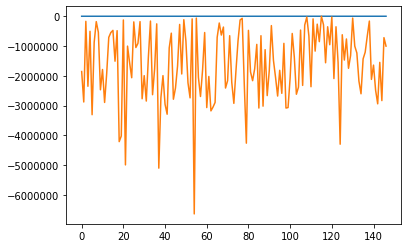

In [44]:
plt.plot(ytest)
plt.plot(predict)